c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

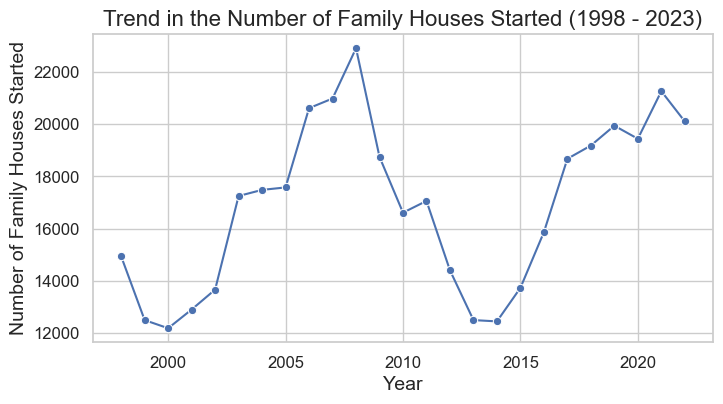

In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    """
    Load and clean the dataset.
    
    Parameters:
        file_path (str): The path to the Excel file.
        
    Returns:
        pd.DataFrame: The cleaned DataFrame.
    """
    # Load the data from Excel file
    df = pd.read_excel(file_path)
    
    # Remove unnecessary header rows and reset index
    df_clean = df.iloc[3:].reset_index(drop=True)
    
    # Set appropriate column names
    column_names = [
        "Year", "Total_Dwellings", "Total_Index", "Family_Houses",
        "Family_Houses_Index", "Multi_Dwelling_Buildings",
        "Multi_Dwelling_Buildings_Index", "Change_Existing_Family_Houses",
        "Change_Existing_Family_Houses_Index", "Change_Existing_Multi_Dwelling_Buildings",
        "Change_Existing_Multi_Dwelling_Buildings_Index", "Non_Residential_Buildings",
        "Non_Residential_Buildings_Index"
    ]
    df_clean.columns = column_names
    
    # Drop rows where 'Year' is NaN
    df_clean = df_clean.dropna(subset=['Year'])
    
    # Filter rows containing only 4-digit years and convert them to numeric type
    df_clean = df_clean[df_clean['Year'].astype(str).str.isnumeric()]
    df_clean['Year'] = pd.to_numeric(df_clean['Year'])
    
    return df_clean

def plot_family_houses_trend(df):
    """
    Plot the trend in the number of family houses started over the years.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the cleaned data.
    """
    # Set plot aesthetics
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))
    
    # Create the plot
    sns.lineplot(x='Year', y='Family_Houses', data=df, marker='o')
    
    # Customize the plot
    plt.title('Trend in the Number of Family Houses Started (1998 - 2023)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Family Houses Started', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Show the plot
    plt.show()

# Main code
if __name__ == "__main__":
    # Path to the Excel file
    file_path = 'data/Housing construction dwellings started 1998 - 2023.xlsx'  # Replace with your file path
    
    # Load and clean the data
    df_clean = load_and_clean_data(file_path)
    
    # Plot the trend in the number of family houses started over the years
    plot_family_houses_trend(df_clean)


In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    
    # Remove unnecessary header rows and reset index
    df_clean = df.iloc[3:].reset_index(drop=True)
    
    # Set appropriate column names
    column_names = [
        "Year", "Total_Dwellings", "Total_Index", "Family_Houses",
        "Family_Houses_Index", "Multi_Dwelling_Buildings",
        "Multi_Dwelling_Buildings_Index", "Change_Existing_Family_Houses",
        "Change_Existing_Family_Houses_Index", "Change_Existing_Multi_Dwelling_Buildings",
        "Change_Existing_Multi_Dwelling_Buildings_Index", "Non_Residential_Buildings",
        "Non_Residential_Buildings_Index"
    ]
    df_clean.columns = column_names
    
    # Filter and convert 'Year' to numeric
    df_clean = df_clean[df_clean['Year'].astype(str).str.isnumeric()]
    df_clean['Year'] = pd.to_numeric(df_clean['Year'])
    
    return df_clean

def plot_family_houses_trend(df):
    """Plot the trend in the number of family houses started over the years using Plotly for interactivity."""
    # Create the interactive plot
    fig = px.line(df, x='Year', y='Family_Houses',
                  title='Trend in the Number of Family Houses Started (1998 - 2023)',
                  labels={'Family_Houses': 'Number of Family Houses Started'},
                  template='plotly_white')
    
    # Customize the plot
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=14,
        ),
        title_font=dict(size=24, family="Arial, bold")
    )
    
    fig.update_yaxes(range=[0, df['Family_Houses'].max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()


file_path = 'data/Housing construction dwellings started 1998 - 2023.xlsx'
df_clean = load_and_clean_data(file_path)
plot_family_houses_trend(df_clean)


In [15]:
file_path = 'data/Housing construction dwellings started 1998 - 2023.xlsx'

In [14]:
# Import required libraries
import pandas as pd
import plotly.express as px

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    # ... [The rest of your cleaning code]
    return df_clean

def plot_family_houses_trend(df, peak_year, peak_value, lowest_year, lowest_value, last_year, last_value):
    """Plot the trend in the number of family houses started over the years using Plotly for interactivity."""
    # Create the interactive plot
    fig = px.line(df, x='Year', y='Family_Houses',
                  title='<b>Trend in the Number of Family Houses Started (1998 - 2023)</b>',
                  labels={'Family_Houses': 'Number of Family Houses Started'},
                  template='plotly_white')
    
    # Customize the plot
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=14,
        ),
        title_font=dict(size=24, family="Arial, bold"),
        annotations=[
            dict(x=peak_year, y=peak_value, xref="x", yref="y",
                 text=f"Peak: {peak_year}, {peak_value}", showarrow=True, arrowhead=7, ax=0, ay=-40),
            dict(x=lowest_year, y=lowest_value, xref="x", yref="y",
                 text=f"Lowest: {lowest_year}, {lowest_value}", showarrow=True, arrowhead=7, ax=0, ay=40),
            dict(x=last_year, y=last_value, xref="x", yref="y",
                 text=f"Latest: {last_year}, {last_value}", showarrow=True, arrowhead=7, ax=0, ay=-40)
        ]
    )
    
    fig.update_yaxes(range=[0, df['Family_Houses'].max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()

# Load and clean the data
file_path = 'data/Housing construction dwellings started 1998 - 2023.xlsx'  # Replace with your file path
df_clean = load_and_clean_data(file_path)

# Identify the peak, the lowest, and the last point
peak_point = df_clean[df_clean['Family_Houses'] == df_clean['Family_Houses'].max()]
lowest_point = df_clean[df_clean['Family_Houses'] == df_clean['Family_Houses'].min()]
last_point = df_clean[df_clean['Year'] == df_clean['Year'].max()]

# Extract the year and number of family houses for these points
peak_year, peak_value = int(peak_point['Year']), int(peak_point['Family_Houses'])
lowest_year, lowest_value = int(lowest_point['Year']), int(lowest_point['Family_Houses'])
last_year, last_value = int(last_point['Year']), int(last_point['Family_Houses'])

# Plot the trend in the number of family houses started over the years
plot_family_houses_trend(df_clean, peak_year, peak_value, lowest_year, lowest_value, last_year, last_value)


C:\Users\Alex\AppData\Local\Temp\ipykernel_62496\4094653648.py:52: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\Alex\AppData\Local\Temp\ipykernel_62496\4094653648.py:53: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\Alex\AppData\Local\Temp\ipykernel_62496\4094653648.py:54: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [16]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    # ... [The rest of your cleaning code]
    return df_clean

def plot_quarterly_trends(df):
    """Plot the quarterly trend in various categories."""
    
    # Create a subplot with shared x-axis
    fig = go.Figure()

    # Add traces for different categories
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Total_Dwellings'], mode='lines+markers', name='Total',
                             line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Family_Houses'], mode='lines+markers', name='In Family Houses',
                             line=dict(color='green')))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Multi_Dwelling_Buildings'], mode='lines+markers', name='In Multi-Dwelling Buildings',
                             line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Change_Existing_Family_Houses'], mode='lines+markers', name='Family Houses',
                             line=dict(color='purple')))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Change_Existing_Multi_Dwelling_Buildings'], mode='lines+markers', name='Multi-Dwelling Buildings',
                             line=dict(color='orange')))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Non_Residential_Buildings'], mode='lines+markers', name='In Non-Residential Buildings',
                             line=dict(color='brown')))
    
    # Customize the layout
    fig.update_layout(
        title='<b>Quarterly Trends in Various Categories (1998 - 2023)</b>',
        xaxis_title='Year',
        yaxis_title='Number of Dwellings',
        font=dict(
            family="Arial, monospace",
            size=14
        ),
        title_font=dict(
            size=24,
            family="Arial, bold"
        )
    )
    
    fig.update_yaxes(range=[0, df[['Total_Dwellings', 'Family_Houses', 'Multi_Dwelling_Buildings', 
                                   'Change_Existing_Family_Houses', 'Change_Existing_Multi_Dwelling_Buildings', 
                                   'Non_Residential_Buildings']].max().max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()

df_clean = load_and_clean_data(file_path)

# Plot the quarterly trends in various categories
plot_quarterly_trends(df_clean)


In [20]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    # ... [The rest of your cleaning code]
    return df_clean

def plot_selected_trends(df):
    """Plot the trend in selected categories."""
    
    # Create a subplot with shared x-axis
    fig = go.Figure()

    # Add traces for the selected categories
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Total_Dwellings'], mode='lines+markers', name='Total',
                             line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Family_Houses'], mode='lines+markers', name='In Family Houses',
                             line=dict(color='green')))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Multi_Dwelling_Buildings'], mode='lines+markers', name='In Multi-Dwelling Buildings',
                             line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Non_Residential_Buildings'], mode='lines+markers', name='In Non-Residential Buildings',
                             line=dict(color='purple')))
    
    # Customize the layout, following the principles from "Storytelling With Data"
    fig.update_layout(
        title='<b>Housing construction, dwellings started: (1998 - 2023)</b>',
        xaxis_title='Year',
        yaxis_title='Number of Dwellings',
        font=dict(
            family="Arial, monospace",
            size=14
        ),
        title_font=dict(
            size=24,
            family="Arial, bold"
        ),
        annotations=[
            dict(x=0.5, y=-0.4, xref="paper", yref="paper",
                 text="Source: Czech Republic Housing Data (1998 - 2023)", showarrow=False)
        ]
    )
    
    fig.update_yaxes(range=[0, df[['Total_Dwellings', 'Family_Houses', 'Multi_Dwelling_Buildings', 'Non_Residential_Buildings']].max().max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()

df_clean = load_and_clean_data(file_path)

# Filter the dataset to keep only the selected categories
selected_columns = ['Year', 'Total_Dwellings', 'Family_Houses', 'Multi_Dwelling_Buildings', 'Non_Residential_Buildings']
df_selected = df_clean[selected_columns]

# Plot the trends in the selected categories
plot_selected_trends(df_selected)


In [21]:
# Import required libraries
import pandas as pd
import plotly.express as px

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    # ... [The rest of your cleaning code]
    return df_clean

# Updating the function to plot the trend for "Total houses started" over the years
def plot_total_houses_trend(df, peak_year, peak_value, lowest_year, lowest_value, last_year, last_value):
    """Plot the trend in the total number of houses started over the years using Plotly for interactivity."""
    
    # Create the interactive plot
    fig = px.line(df, x='Year', y='Total_Dwellings',
                  title='<b>Trend in the Total Number of Houses Started (1998 - 2023)</b>',
                  labels={'Total_Dwellings': 'Total Number of Houses Started'},
                  template='plotly_white')
    
    # Customize the plot
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=14,
        ),
        title_font=dict(size=24, family="Arial, bold"),
        annotations=[
            dict(x=peak_year, y=peak_value, xref="x", yref="y",
                 text=f"Peak: {peak_year}, {peak_value}", showarrow=True, arrowhead=7, ax=0, ay=-40),
            dict(x=lowest_year, y=lowest_value, xref="x", yref="y",
                 text=f"Lowest: {lowest_year}, {lowest_value}", showarrow=True, arrowhead=7, ax=0, ay=40),
            dict(x=last_year, y=last_value, xref="x", yref="y",
                 text=f"Latest: {last_year}, {last_value}", showarrow=True, arrowhead=7, ax=0, ay=-40)
        ]
    )
    
    fig.update_yaxes(range=[0, df['Total_Dwellings'].max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()

df_clean = load_and_clean_data(file_path)

# Identify the peak, the lowest, and the last point for "Total_Dwellings"
peak_point_total = df_clean[df_clean['Total_Dwellings'] == df_clean['Total_Dwellings'].max()]
lowest_point_total = df_clean[df_clean['Total_Dwellings'] == df_clean['Total_Dwellings'].min()]
last_point_total = df_clean[df_clean['Year'] == df_clean['Year'].max()]

# Extract the year and total number of houses started for these points
peak_year_total, peak_value_total = int(peak_point_total['Year']), int(peak_point_total['Total_Dwellings'])
lowest_year_total, lowest_value_total = int(lowest_point_total['Year']), int(lowest_point_total['Total_Dwellings'])
last_year_total, last_value_total = int(last_point_total['Year']), int(last_point_total['Total_Dwellings'])

# Plot the trend in the total number of houses started over the years
plot_total_houses_trend(df_clean, peak_year_total, peak_value_total, lowest_year_total, lowest_value_total, last_year_total, last_value_total)


C:\Users\Alex\AppData\Local\Temp\ipykernel_62496\147814465.py:52: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\Alex\AppData\Local\Temp\ipykernel_62496\147814465.py:53: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\Alex\AppData\Local\Temp\ipykernel_62496\147814465.py:54: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [23]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    # ... [The rest of your cleaning code]
    return df_clean

# Updating the function to plot the trend for selected categories with specific customization
def plot_selected_trends_improved(df):
    """Plot the trend in selected categories following principles from 'Storytelling With Data'."""
    
    # Create a subplot with shared x-axis
    fig = go.Figure()

    # Add traces for the selected categories with balanced colors
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Total_Dwellings'], mode='lines', name='Total',
                             line=dict(color='lightgrey', width=2)))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Family_Houses'], mode='lines', name='In Family Houses',
                             line=dict(color='green', width=3)))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Multi_Dwelling_Buildings'], mode='lines', name='In Multi-Dwelling Buildings',
                             line=dict(color='red', width=3)))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Non_Residential_Buildings'], mode='lines', name='In Non-Residential Buildings',
                             line=dict(color='purple', width=3)))
    
    # Customize the layout, following the principles from "Storytelling With Data"
    fig.update_layout(
        plot_bgcolor='white',  # White background color
        title='<b>Housing construction, dwellings started: (1998 - 2023)</b>',
        xaxis_title='Year',
        yaxis_title='Number of Dwellings',
        font=dict(
            family="Arial, monospace",
            size=14
        ),
        title_font=dict(
            size=24,
            family="Arial, bold"
        ),
        annotations=[
            dict(x=0.5, y=-0.4, xref="paper", yref="paper",
                 text="Source: Czech Republic Housing Data (1998 - 2023)", showarrow=False)
        ]
    )
    
    fig.update_yaxes(range=[0, df[['Total_Dwellings', 'Family_Houses', 'Multi_Dwelling_Buildings', 'Non_Residential_Buildings']].max().max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()

# Assume df_clean is loaded and cleaned data (replace with actual cleaning steps)
# df_clean = load_and_clean_data(file_path)

# Filter the dataset to keep only the selected categories
selected_columns = ['Year', 'Total_Dwellings', 'Family_Houses', 'Multi_Dwelling_Buildings', 'Non_Residential_Buildings']
df_selected = df_clean[selected_columns]

# Plot the trends in the selected categories with improved styling
plot_selected_trends_improved(df_selected)
